In [1]:
import jieba
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from imageio import imread
from collections import Counter
import numpy as np
import re

In [2]:
# 读入数据文件文件
content = open('gzbg2018.txt').read()
content[:99]     #显示部分数据内容

'政府工作报告\n\n——2018年3月5日在第十三届全国人民代表大会第一次会议上\n\n国务院总理\u3000李克强\n\n各位代表：\n\n\u3000\u3000现在，我代表国务院，向大会报告过去五年政府工作，对今年工作提出建议，请予审议，'

In [3]:
#数据清理
content = re.sub(r'\n+','',content) #remove \n
content = re.sub(r' +','',content)  #remove blank
content = re.sub(r'\W+',' ',content) #replace symbols with blank
content[:99]      #显示部分文本内容

'政府工作报告 2018年3月5日在第十三届全国人民代表大会第一次会议上国务院总理 李克强各位代表 现在 我代表国务院 向大会报告过去五年政府工作 对今年工作提出建议 请予审议 并请全国政协委员提出意'

In [4]:
#分词
seg_list = list(jieba.cut(content))
print("分词结果: \n","/".join(seg_list[:99]))     #显示部分分词结果

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/zt/_gpwfbgn0919jcl5k156sjtr0000gp/T/jieba.cache
Loading model cost 1.036 seconds.
Prefix dict has been built successfully.


分词结果: 
 政府/工作/报告/ /2018/年/3/月/5/日/在/第十三届/全国人民代表大会/第一次/会议/上/国务院/总理/ /李克强/各位/代表/ /现在/ /我/代表/国务院/ /向/大会/报告/过去/五年/政府/工作/ /对/今年/工作/提出/建议/ /请予/审议/ /并/请/全国政协/委员/提出/意见/ /一/ /过去/五年/工作/回顾/ /第十二届/全国人民代表大会/第一次/会议/以来/的/五年/ /是/我国/发展/进程/中极/不/平凡/的/五年/ /面对/极其/错综复杂/的/国内外/形势/ /以/习近平/同志/为/核心/的/党中央/团结/带领/全国/各族人民/砥砺/前行/ 


In [5]:
#加载停用词表
stopwords = open('stopwords.txt').read() #长字符串
stopwords = stopwords.split('\n')       #字符串按'\n'分割，构建列表类型
print("停用词: \n",",".join(stopwords[:20]))      #显示部分停用词，第一个为空格

停用词: 
  ,?,、,。,“,”,《,》,！,，,：,；,？,同志们,同时,啊,阿,哎,哎呀,哎哟


In [6]:
#去停用词
final_content = []
for seg in seg_list:
    if seg not in stopwords:
        final_content.append(seg)
print("分词结果: \n","/".join(final_content[:99]))     #显示部分处理结果

分词结果: 
 政府/工作/报告/2018/年/月/日/第十三届/全国人民代表大会/第一次/会议/国务院/总理/李克强/代表/现在/代表/国务院/大会/报告/过去/五年/政府/工作/今年/工作/提出/建议/请予/审议/请/全国政协/委员/提出/意见/过去/五年/工作/回顾/第十二届/全国人民代表大会/第一次/会议/以来/五年/我国/发展/进程/中极/平凡/五年/面对/错综复杂/国内外/形势/习近平/同志/核心/党中央/团结/带领/全国/各族人民/砥砺/前行/统筹/推进/五位一体/总体布局/协调/推进/四个/全面/战略/布局/改革开放/现代化/建设/全面/开/创新/局面/党/十九/确立/习近平/新/时代/中国/特色/思想/历史/地位/制定/决胜/全面/建成/小康社会/夺取


In [7]:
#使用 counter 做词频统计，选取出现频率前 500 的词汇
counting_words = Counter(final_content)
print(str(counting_words))
common_words = counting_words.most_common(500)

Counter({'发展': 138, '改革': 84, '推进': 74, '经济': 60, '加强': 57, '建设': 51, '创新': 50, '全面': 49, '新': 47, '中国': 40, '企业': 37, '坚持': 37, '提高': 36, '完善': 36, '工作': 35, '政府': 33, '增长': 33, '社会': 33, '加快': 32, '推动': 31, '制度': 31, '实施': 30, '支持': 30, '教育': 27, '促进': 27, '深化': 27, '增加': 25, '服务': 25, '政策': 25, '重大': 24, '实现': 24, '五年': 23, '结构': 23, '人民': 22, '我国': 21, '就业': 21, '投资': 21, '继续': 21, '优化': 20, '农村': 20, '加大': 20, '扩大': 20, '国家': 20, '群众': 20, '世界': 19, '领域': 19, '机制': 19, '今年': 18, '取得': 18, '风险': 18, '合作': 18, '地区': 17, '深入': 17, '以上': 17, '好': 17, '国际': 17, '供给': 17, '力度': 17, '特色': 16, '着力': 16, '积极': 16, '地方': 16, '体系': 16, '坚决': 16, '持续': 15, '重点': 15, '保障': 15, '维护': 15, '治理': 15, '降低': 14, '落实': 14, '解决': 14, '习近平': 13, '保持': 13, '下降': 13, '问题': 13, '管理': 13, '专项': 13, '再': 13, '安全': 13, '监管': 13, '开放': 13, '健全': 13, '文化': 13, '万亿元': 12, '创业': 12, '市场': 12, '改善': 12, '质量': 12, '民生': 12, '提升': 12, '水平': 12, '标准': 12, '代表': 11, '制定': 11, '增强': 11, '消费': 11, '互联网': 11, '主要': 11, 

In [11]:
# 读入图片，配置词云背景
backgroud_pic = imread('China.jpg')
# 配置词云参数
wc = WordCloud(
    # 设置背景色,我这里设置为了..
    background_color = 'white',
    # 设置词云形状，就是之前读入的图片
    mask = backgroud_pic,
    # 设置字体,字体路径要正确，不然会报错，最好和py文件放在一块
    font_path = 'simhei.ttf',

    max_words=2000,      # 设置最大现实的字数
    max_font_size=150,  # 设置字体最大值
    
    margin=1,          #设置词间间距
  
    random_state=30,   # 设置有多少种随机生成状态，即有多少种配色方案
    scale = 1        #按照比例进行放大画布
    )

In [12]:
wc.generate_from_frequencies(dict(common_words)) # 从字典生成词云

wc.to_file("myWordCloud.png")

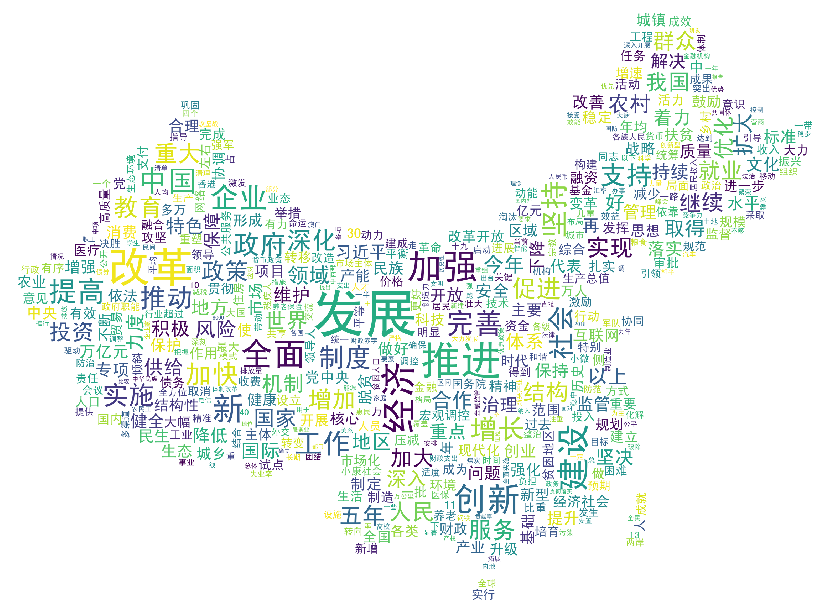

In [13]:
%matplotlib inline
wc_pic = imread('myWordCloud.png')
plt.figure(figsize=(15,11)) 
plt.imshow(wc_pic) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show()

![title](myWordCloud.png)